# MLP를 활용한 의류 이미지 분류

#1. 데이터 로드
* Fashion MNIST data set
  * 딥러닝을 처음 배울 때 많이 사용하는 데이터셋으로, 28*28 사이즈의 패션 아이템 이미지로 구성된 데이터 

  
  | 레이블      | 0      | 1    | 2      | 3      | 4    | 5    | 6    | 7        | 8    | 9         |
| ----------- | ------ | ---- | ------ | ------ | ---- | ---- | ---- | -------- | ---- | --------- |
| 패션 아이템 | 티셔츠 | 바지 | 스웨터 | 드레스 | 코트 | 샌달 | 셔츠 | 스니커즈 | 가방 | 앵클 부츠 |
  



  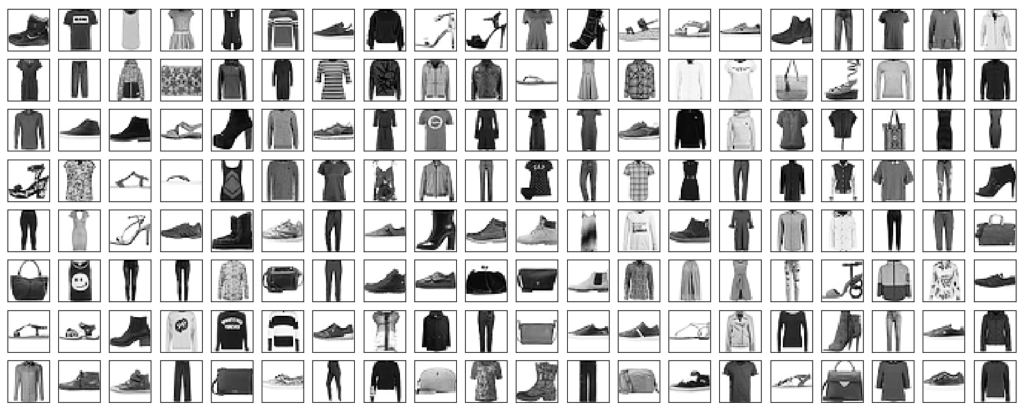

* 텐서플로우와 케라스

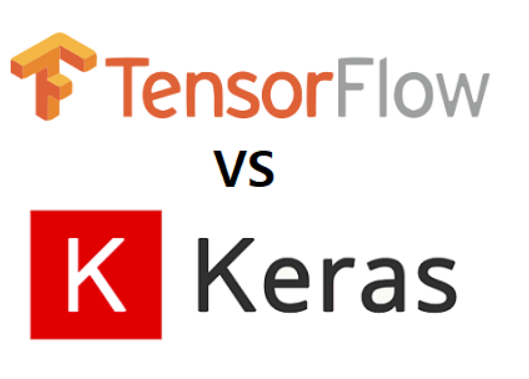

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 고정
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [ ]:
from tensorflow import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


* 데이터 확인(이미지 로드)
  * 이미지 픽셀 사이즈가 28*28로 매우 작은편이라 이미지가 흐릿함

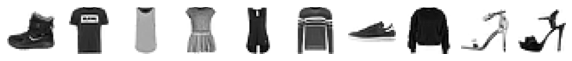

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize = (10,10))

for i in range(10):
  axs[i].imshow(X_train[i], cmap = 'gray_r')
  axs[i].axis('off') #축에는 아무것도 표시 하지 않음
plt.show()

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
X_train[0].shape

(28, 28)

  | 레이블      | 0      | 1    | 2      | 3      | 4    | 5    | 6    | 7        | 8    | 9         |
| ----------- | ------ | ---- | ------ | ------ | ---- | ---- | ---- | -------- | ---- | --------- |
| 패션 아이템 | 티셔츠 | 바지 | 스웨터 | 드레스 | 코트 | 샌달 | 셔츠 | 스니커즈 | 가방 | 앵클 부츠 |
  

In [ ]:
for i in range(10):
  print(f'{i}번째 그림은 {y_train[i]}번 아이템' )

0번째 그림은 9번 아이템
1번째 그림은 0번 아이템
2번째 그림은 0번 아이템
3번째 그림은 3번 아이템
4번째 그림은 0번 아이템
5번째 그림은 2번 아이템
6번째 그림은 7번 아이템
7번째 그림은 2번 아이템
8번째 그림은 5번 아이템
9번째 그림은 5번 아이템


* 데이터 형태 확인

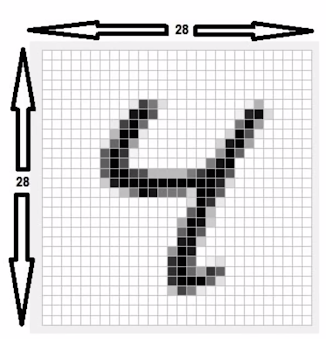

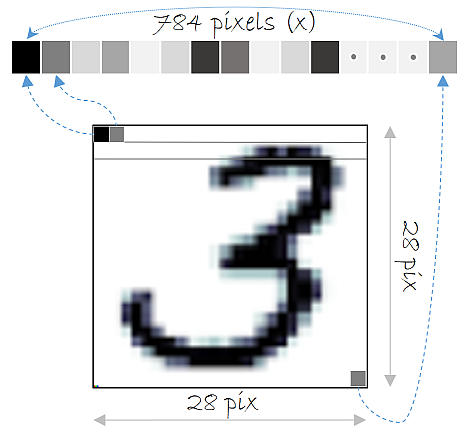

In [ ]:
X_train.shape

(60000, 28, 28)

#2. 데이터 전처리

##2-1 데이터 스케일링

* 이미지 데이터에서 하나의 픽셀은 0~255의 값으로 표현됨
  * 해당 값들은 0~1 사이로 정규화하기 위해 255로 나누어 줌



In [ ]:
X_train_scaled = X_train / 255.0


In [ ]:
X_train_scaled.shape

(60000, 28, 28)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1, 28*28) # reshape 이유 설명

In [ ]:
X_train_scaled.shape

(60000, 784)

In [ ]:
temp = X_train_scaled.copy()

In [ ]:
temp.reshape(60000, -1, 28).shape

(60000, 28, 28)

##2-2 데이터 셋 나누기(Train / Test)

In [ ]:
#사실 패션 MNIST 데이터는 이미 잘 섞인 데이터라 split 따로 안하고 해도 되지만 일반적인 상황을 가정하여 데이터를 섞었음 

In [ ]:
from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_train_scaled, y_train, test_size = 0.2, random_state = 2022)

In [ ]:
X_train_scaled.shape, y_train.shape

((48000, 784), (48000,))

In [ ]:
X_test_scaled.shape, y_test.shape

((12000, 784), (12000,))

#3. 모델링(MLP)

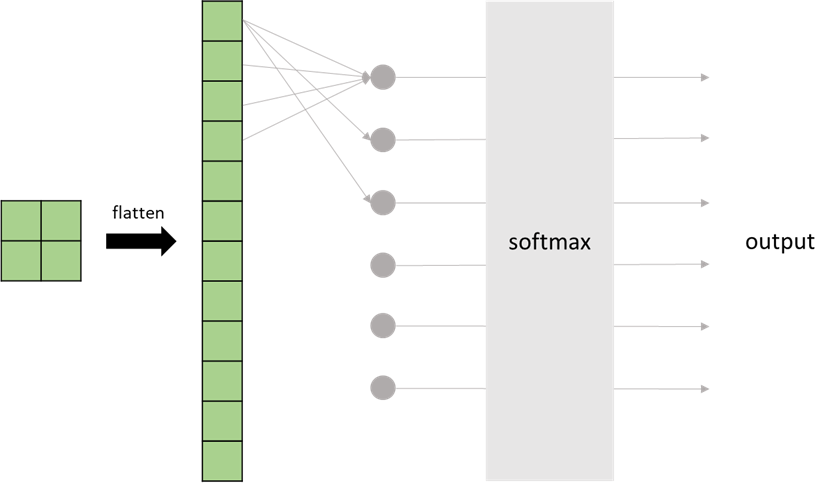

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
dense = keras.layers.Dense(10, activation = 'softmax', input_shape = (28*28, )) #28*28 크기의 인풋이 들어가서 10개의 히든 노드를 거침 

In [ ]:
model = keras.Sequential(dense) #신경망 모델

In [ ]:
model.summary() #구성한 모델의 형태

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


#4. 모델 학습 및 평가

* compile: 모델을 학습시키기 위한 학습과정을 설정하는 단계

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')  #다중 분류 시 손실함수

In [ ]:
model.fit(X_train_scaled, y_train, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6106 - accuracy: 0.7960
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4797 - accuracy: 0.8393
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4566 - accuracy: 0.8481
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4451 - accuracy: 0.8516
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4370 - accuracy: 0.8542


In [ ]:
model.evaluate(X_test_scaled, y_test)

375/375 [==============================] - 1s 2ms/step - loss: 0.4526 - accuracy: 0.8503


[0.45258215069770813, 0.8502500057220459]

In [ ]:
pred = model.predict(X_test_scaled[:5])

pred.shape

1/1 [==============================] - 0s 54ms/step


(5, 10)

In [ ]:
pred[0].argmax()

0

* 역스케일링 

In [ ]:
temp = (X_test_scaled[0]*255).reshape(28,28)
temp.shape

(28, 28)

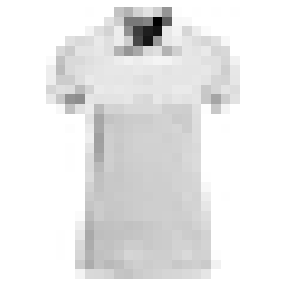

In [ ]:
fig, axs = plt.subplots(1, 1, figsize = (5,5))
axs.imshow(temp, cmap='gray_r')
axs.axis('off')
plt.show()

In [ ]:
X_test_scaled[0].shape

(784,)

* 예측 결과 확인

1/1 [==============================] - 0s 27ms/step


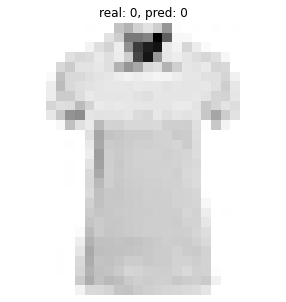

1/1 [==============================] - 0s 26ms/step


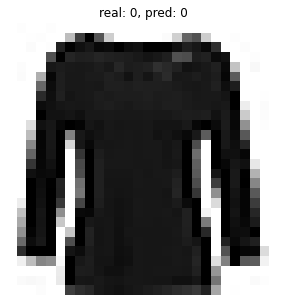

1/1 [==============================] - 0s 26ms/step


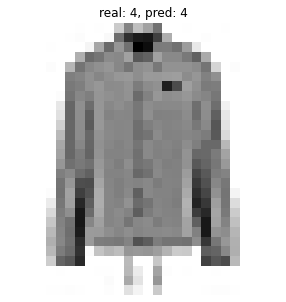

1/1 [==============================] - 0s 27ms/step


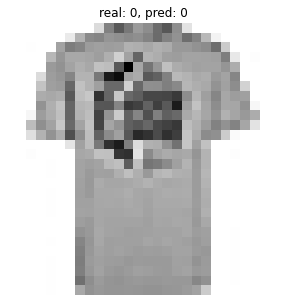

1/1 [==============================] - 0s 29ms/step


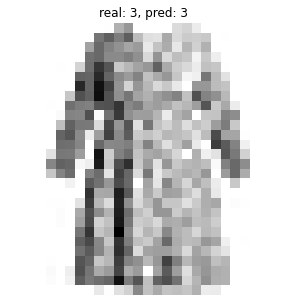

1/1 [==============================] - 0s 33ms/step


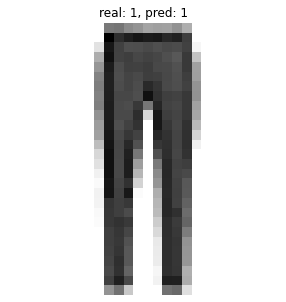

1/1 [==============================] - 0s 29ms/step


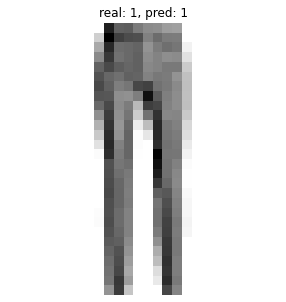

1/1 [==============================] - 0s 26ms/step


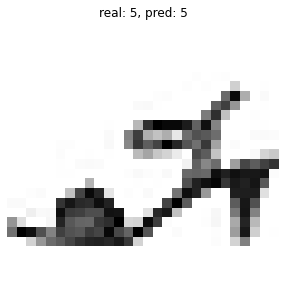

1/1 [==============================] - 0s 32ms/step


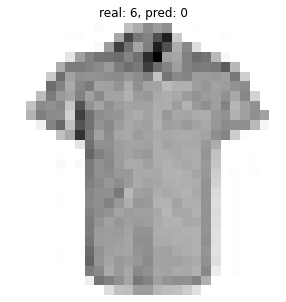

1/1 [==============================] - 0s 28ms/step


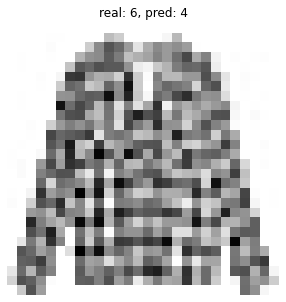

In [ ]:
import matplotlib.pyplot as plt

for i in range(10):
  fig, axs = plt.subplots(1, 1, figsize = (5,5))
  #예측 결과
  pred = model.predict(X_test_scaled[i].reshape(-1, 28*28))

  #예측 클래스
  pred_result = pred.argmax()

  #역스케일링
  temp = (X_test_scaled[i]*255).reshape(28,28)
  
  axs.imshow(temp, cmap = 'gray_r')
  axs.axis('off')
  plt.title(f"real: {y_test[i]}, pred: {pred_result}")
  plt.show()
  

#5. 모델 재구성

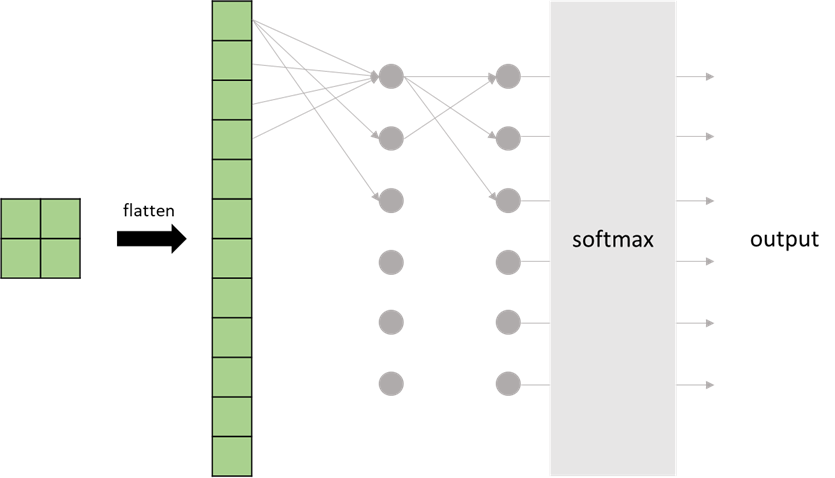

In [ ]:
dense1 = keras.layers.Dense(100, activation = 'sigmoid', input_shape=(28*28,))
dense2 = keras.layers.Dense(10,activation = 'softmax')

In [ ]:
model=keras.Sequential([dense1, dense2])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scaled, y_train, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5643 - accuracy: 0.8105
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4072 - accuracy: 0.8533
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3721 - accuracy: 0.8655
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3505 - accuracy: 0.8729
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3325 - accuracy: 0.8792


In [ ]:
model.evaluate(X_test_scaled, y_test)

375/375 [==============================] - 1s 2ms/step - loss: 0.3456 - accuracy: 0.8733


[0.3456155061721802, 0.8733333349227905]

In [ ]:
pred = model.predict(X_test_scaled[:5])

pred.shape

1/1 [==============================] - 0s 55ms/step


(5, 10)

1/1 [==============================] - 0s 27ms/step


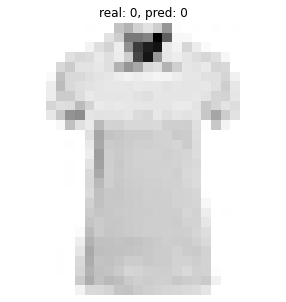

1/1 [==============================] - 0s 31ms/step


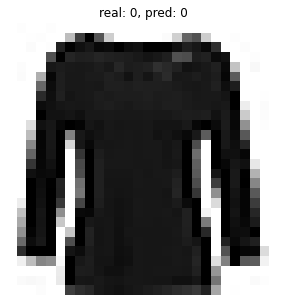

1/1 [==============================] - 0s 29ms/step


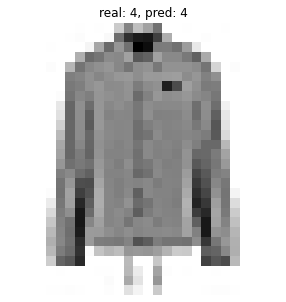

1/1 [==============================] - 0s 26ms/step


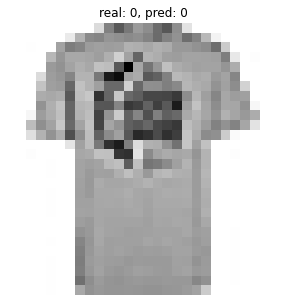

1/1 [==============================] - 0s 29ms/step


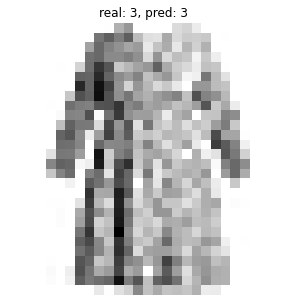

1/1 [==============================] - 0s 29ms/step


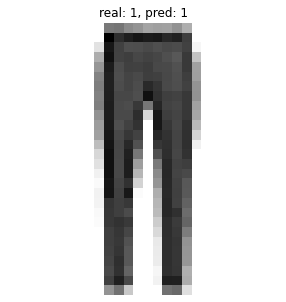

1/1 [==============================] - 0s 28ms/step


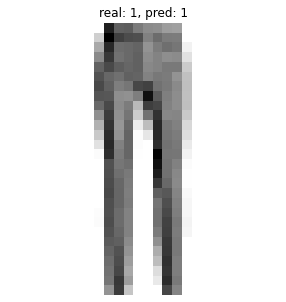

1/1 [==============================] - 0s 27ms/step


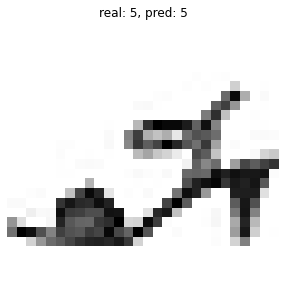

1/1 [==============================] - 0s 26ms/step


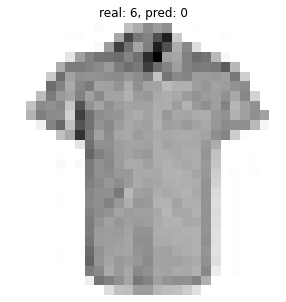

1/1 [==============================] - 0s 27ms/step


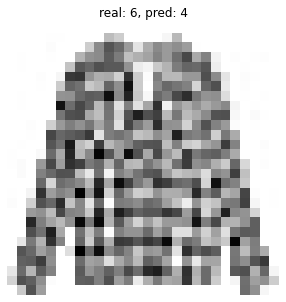

In [ ]:
import matplotlib.pyplot as plt

for i in range(10):
  fig, axs = plt.subplots(1, 1, figsize = (5,5))
  #예측 결과
  pred = model.predict(X_test_scaled[i].reshape(-1, 28*28))

  #예측 클래스
  pred_result = pred.argmax()

  #역스케일링
  temp = (X_test_scaled[i]*255).reshape(28,28)
  
  axs.imshow(temp, cmap = 'gray_r')
  axs.axis('off')
  plt.title(f"real: {y_test[i]}, pred: {pred_result}")
  plt.show()
  